# Making a map using the on-demand mapping services for a basemap and super-imposing some data

## Background 

The most familiar mapping services are those we often use to navigate with our phones for example: google maps. The difference between google maps and many of the examples we have looked at so far is that we do not download data in advance, process it and then create a map. Instead we have access to data when we need it and a a _relevant_ resolution. If we want to make a global map that is 1000 pixels across then Australia is probably just a few dozen pixels wide. If we instead decide to make a map to navigate across Melbourne, then a much higher resolution is needed _but only within the boundary of the map_. 

`Cartopy` provides access to various of the online mapping services that will serve image data on demand in the form of small image tiles at a specified resolution. The tools automatically query the service and assemble the tiles to make the map but there are some tricks that we need to know before we can use them.

## Exercise

This notebook is a template that needs to have some functions defined that it can use to plot the map.

Your job is to provide those functions so that this notebook will work. You are not going to change this notebook at all !

In [1]:
from src.dependencies import *
from src.my_functions import *

In [2]:
display_markdown(my_documentation(), raw=True)

   
# Haec progressio est tabula faciens
    
## Moderni progressio programmandi 

Moderni programmandi rationem habet organicam, accumsan sentientem, ut mirum inveniat. In hoc cursu discimus quomodo per laminis perlegere discamus quomodo programmata aedificent et quomodo nostra edificent. Incipiamus cum aliquibus praecipuis quaestionibus. 

## Quid computatorium ? 

Computatorium classicum est machina alicuius generis ad informationes puras expediendas. Varia elementa opus sunt ad hoc possibilis efficiendum, inter quas aliqua instrumenta initialisendi et recondendi informationes ante et post discursum est, et ma- china ad informationes expediendas (including casus ubi processus pendet ab ipsa informatione). Multae variae machinis his criteriis occurrere possunt, sed plerumque unam saltem exigentiam adiungimus:

## Aequationes mathematicae 

Per "Navier-Stokes" datae sunt

$$
    \frac{D \mathbf{u}}{Dt} -\nabla \cdot \eta \left( \nabla \mathbf{u} + \nabla \mathbf{u}^T \right) - \nabla p = \cdots
$$


## `Python` documentum

Python hic est aliquis codicem quem animum advertere volumus

```python

# The classic "hello world" program
print("salve mundi !")

```



In [3]:
coastline = my_coastlines("10m")
water_features = my_water_features("50m")

In [8]:
map_tiles_dictionary = my_basemaps()

/opt/homebrew/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/opt/homebrew/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/opt/homebrew/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


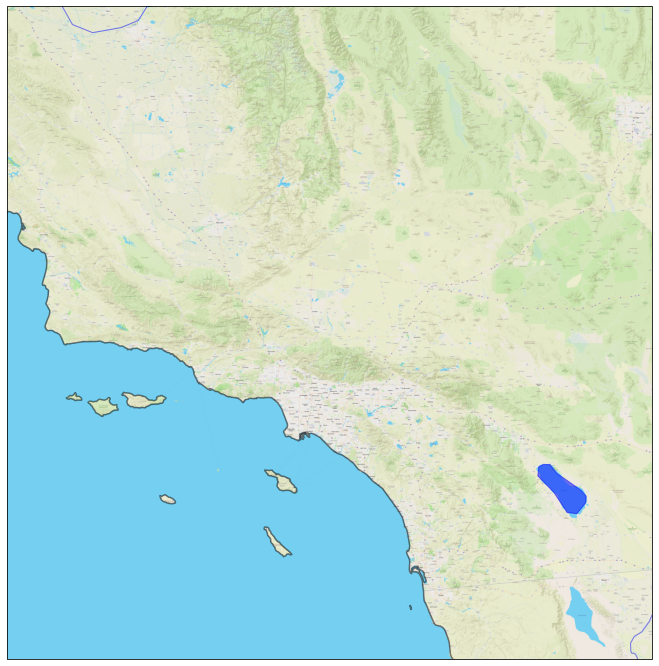

In [6]:
# Specify a region of interest

lat0 =  32  ; lat1 = 37
lon0 =  -121; lon1 = -115

map_extent = [lon0, lon1, lat0, lat1]

map_tiles = map_tiles_dictionary["mapbox_outdoors"]

fig = plt.figure(figsize=(12, 12), facecolor="none")

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)
# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 

ax.add_image(map_tiles, 10)
ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black", zorder=1, alpha=0.5)
for feature in water_features:
    ax.add_feature(feature,    linewidth=1.0,  edgecolor="Blue",  zorder=2, alpha=0.5)

In [7]:
fig.savefig("LA_Basin_Map.png", dpi=600)

See how well that worked by opening the [full-size image](./LA_Basin_Map.png). 

There really is a lot of detail available, but you can also see how long it takes to download and build the different resolutions. There is something of an art to finding the right balance. 

You may also find that very high resolution output results in memory errors. If so, restart the kernel and try again with a small image or lower dpi.